### notes

logistic regression classification
sections
* problem
* simple ML classifier
* more classification techniques
* hyperparameter tuning (gridsearch)
* classifying images

4 types of models
* classification
* Regression - continuous
* clustering - logical groupings
* dimensionality reduction

steps
* identify problem/goal
* select model
* train
* test 
* predict

output depends on what you feed in (corpus)
* objective/loss function
* feed back from output to improve the model (minimize the loss function)

cross-entropy - loss function to minimize
* MSE for linear regression
* cross entropy for logistic regression - how well does the s-curve align with actual data
* probability distributions are in sync (magnitude may be different but want actual and predicted to be the same sign
![scurve formula](scurve_formula.png "scurve")
evaluation metrics
* accuracy - compare predicted labels vs actual labels - more matches = more accuracy
    * could have high accuracy but still be a bad model (wrong predictions)
    * not accurate with skeweed data (some very rare or very comon labels
    * confusion matrix - predicted labels (cols) vs actual labels (rows)
    * accuracy = TP+TN/N
    * <img src="confusionmatrix.png" width=500 />
        * true positives = TP
        * false positives
        * true negatives
        * false negatives
* precision - accuracy of model when making positive assertions - fewer false positives are better
    * TP/(TP+FP)
* recall - accuracy of model when acutal should be positive
    * TP/(TP+FN)
    
application
* output of classifier is a probability score
* what is the probability threshold to decide that the clasification is correct (usu 50%)
* always positive classifier Pthresh =0: recall = 100%; precision 13.7%: not conservative enough
    * less conservative = more precision
* always negative classifier Pthresh =1: recall = 0%; precision = infinity (invereted s shape)
<img src="precisionrecalltradeoff.png" width =500 />
* what is the right value of Pthreshold - use ROC curve
    * plot y(True Pos) * x (False Pos)
    * hyperparameter training - change the threshold and get result 
    * pick top left corner = maximzie trupe pos and minimize false pos
<img src="rocpick.png" width=400 />

Types of classifcation - models may be inherently better at one
* binary classification - very common
* multi-class classifcation (superset) 
* multi-label - tuple of multiple binary variables 
* multi-output - tuple of classes

approaches?
* 1 vs all - create binary classifier for each case and output = highest score
* 1 vs 1 - create all pairs N(N-1)/2 classifiers and output = most wins



    


glossary
* ROC = reciver operating characteristic

demo files in datasets folder
* fashion-mnist-train.csv
* titanic_processed.csv
* titanic_train.csv

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sklearn.__version__

'0.23.1'

In [3]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.head()#target = survived
#SibSp = sibling spouse - nunmber of siblings or spouse also on
#Parch - parent child - traveled with
#Embarked - where they boarded: S = Southampton; C = Cherbourg; Q = Queenstown

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
#drop cols not relevant to pred
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'], 'columns', inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
#check for missing in each column
#fill in with imputation or just drop
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [7]:
titanic_df = titanic_df.dropna()

In [8]:
titanic_df.shape

(712, 8)

In [9]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

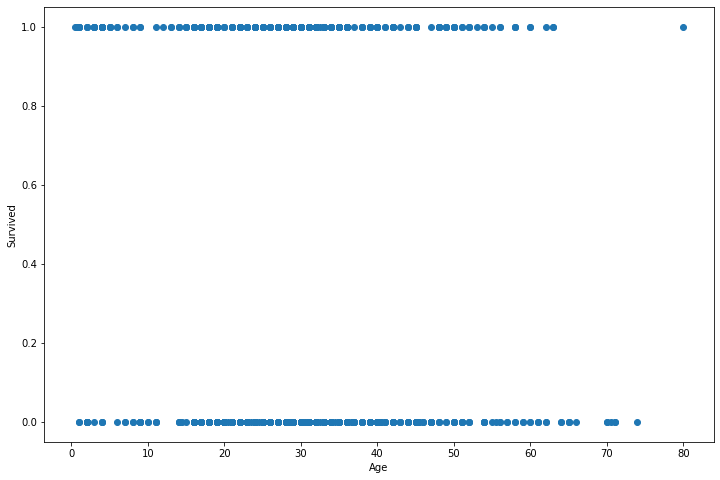

In [11]:
fig, ax = plt.subplots(figsize =(12,8))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

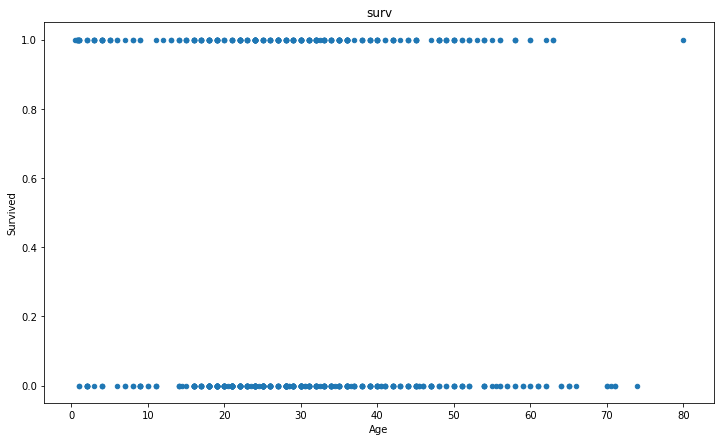

In [12]:
titanic_df.plot.scatter(x='Age', y='Survived', figsize=(12,7), title='surv')

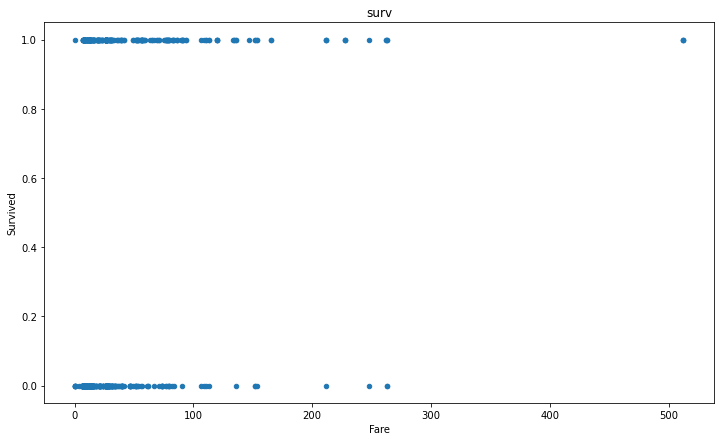

In [13]:
titanic_df.plot.scatter(x='Fare', y='Survived', figsize=(12,7), title='surv')

In [14]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [15]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [16]:
titanic_df_corr = titanic_df.corr()
titanic_df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


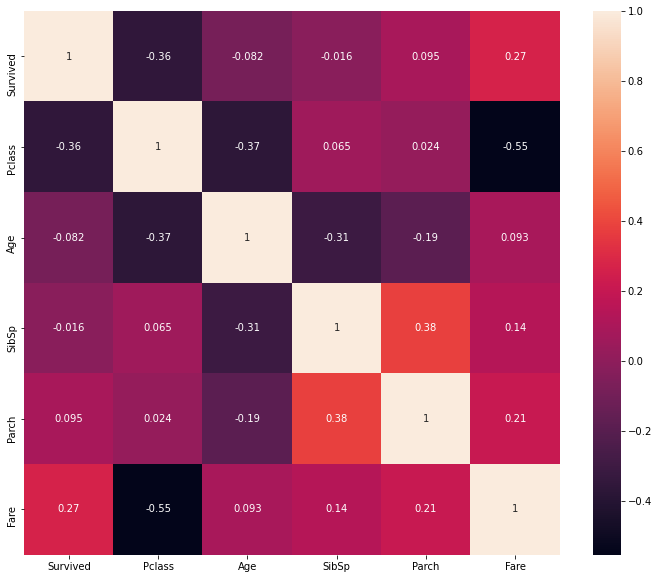

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(titanic_df_corr, annot=True)#annot = raw corr numbers

In [18]:
#preprocessing
#convert categories to numbers
#labelencoder for ordinal (inherent order) - also good for binary data
# 0=Female ; 1 = male
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [19]:
label_encoding.classes_ #original values

array(['female', 'male'], dtype=object)

In [20]:
#one-host encoding - used when categories don't have an inherent order
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [21]:
#shuffle records and save as csv
#shuffling is more critical for NN
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)#from % subset is 100%
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,30.0,0,0,8.6625,0,0,1
1,0,3,0,25.0,1,0,7.9250,0,0,1
2,0,1,1,36.0,1,0,78.8500,0,0,1
3,0,3,1,20.0,0,0,9.8458,0,0,1
4,1,2,1,31.0,0,0,13.0000,0,0,1


In [22]:
titanic_df.to_csv('datasets/titanic_processed.csv', index=False)

In [23]:
import os
print(" ".join(os.listdir('datasets')))

auto-mpg-processed.csv auto-mpg.csv auto_mpg_processed.csv cars.csv cars_processed.csv diabetes.csv diabetes_processed.csv diabetes_processed_incomplete.csv driver_details.csv exams.csv fashion-mnist_train.csv GoSales_Tx_LogisticRegression.csv housing.csv iris.csv titanic_processed.csv titanic_train.csv train.csv


# binaryClassification_LogisticRegression_Titanic

In [24]:
titanic_df.shape

(712, 10)

In [25]:
from sklearn.model_selection import train_test_split
X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']
 # 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2)#auto-shuffles #20% holdout

In [26]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [27]:
x_test.shape, y_test.shape

((143, 9), (143,))

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)
#penalty - regularize the model by applying a penalty to complex models (avoid overvitting)- 
# options are l1, l2 (letter ell not digit 1)
# l2 = sum of squares of coefficients
# C strength of regularization (inverse) - smaller values = stronger regularization
# solver = algorithm (optimization problem) - liblinear is good for smaller datasets

In [29]:
y_pred = logistic_model.predict(x_test)

In [30]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [31]:
pred_results.head()

,y_test,y_pred
511,0,0
254,1,0
626,1,1
509,0,0
119,0,0


In [32]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,74,13
1,13,43


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [34]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"accuracy score: {acc}\nprecision score: {prec}\nrecall score: {recall}")
#lower recall score means that more survived than predicted by model

accuracy score: 0.8181818181818182
precision score: 0.7678571428571429
recall score: 0.7678571428571429


In [35]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [36]:
accuracy_score_verified = (TP+TN)/(TP+FP+TN+FN)
accuracy_score_verified

0.8181818181818182

In [37]:
precision_score_verified = (TP/(TP+FP))
precision_score_verified

0.7678571428571429

In [38]:
recall_score_verified = TP/(TP+FN)
recall_score_verified

0.7678571428571429

# MultipleClassificationModels_Titanic

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [40]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,30.0,0,0,8.6625,0,0,1
1,0,3,0,25.0,1,0,7.9250,0,0,1
2,0,1,1,36.0,1,0,78.8500,0,0,1
3,0,3,1,20.0,0,0,9.8458,0,0,1
4,1,2,1,31.0,0,0,13.0000,0,0,1


In [41]:
FEATURES = list(titanic_df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [42]:
result_dict={} #to hold the results of each classification model

In [43]:
#helper function
def summarize_classification(y_test, y_pred):
    acc=accuracy_score(y_test, y_pred, normalize=True)#fraction %
    num_acc = accuracy_score(y_test, y_pred, normalize=False)#raw number
    
    prec=precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'accuracy':acc, 'precision':prec, 'recall':recall, 'accuracy count':num_acc}

In [44]:
#build model helper
def build_model(classifier_fn, name_of_y_col, names_of_x_cols, dataset, test_frac=0.2):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    x_train, x_test, y_trasin, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = classifier_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)#confusion matrix
    
    return {'training': train_summary, 'test':test_summary, 'confusion_matrix':model_crosstab}
    
    
    

In [45]:
 def compare_results():
        for key in result_dict:
            print('Classification: ', key)
            
            print('\nTraining data')
            for score in result_dict[key]['training']:
                print(score, result_dict[key]['training'][score])
                
            print('\nTest data')
            for score in result_dict[key]['test']:
                print(score, result_dict[key]['test'][score])
            
            print()

In [46]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    return model

In [47]:
result_dict['survived ~ logistic'] = build_model(logistic_fn, 'Survived', FEATURES, titanic_df)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82



### models
* discriminant
    * linear
    * quadratic
* stochastic gradient descent (SGD)
* Support Vector Machines (SVM) - hyperplane
* Nearest Neighbor - 2 flavors
* decision tree
* naive bayes

<img src='modelpaths.png' width=400 />
<img src='class_select.png' width=400 />

### discriminant
dimensionality depends on choice of axes
PCA = find the best 'directions' to represent the data
* direction is good if distances between point projections is maximized (bad if minimized = information is lost)
* preserve as much of underlying variance as possible'
* the first such projection is the 'first principle component'
* next principle component should be at right angle to the first
    * right angles express teh most variation with the smallest number of directions (e.g. y axis is 90 degress from x axis)
    * as many principle components as there are dimensions of original data
    * remapping original dimensions to new axes
* LDA - same underlying principles to PCA except LDA chooses new axes that minimize distance between points of different categories
    * find axes to best separate the classes such that all instances of a class are in teh same quadrant
<img src='lda_axis_selection.png' width=400 />
* QDA - variant of LDA better suited to cases where x-vars corresponding to diff y-labels have diff covariances
    * covariance - relationship between two variables 
    * diff y-labels are diff categories
    * i.e. linear regressions for each category are not roughly parallel
<img src='qda_v_lda.png' width=400 />



In [48]:
def linear_discriminant_fn(x_train, y_train, solver='svd'):#svd = singular value decomposition <default> - doesn't calculate covariance - good for many records
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)
    
    return model

In [49]:
result_dict['survived ~ linear_discriminant_analysis'] = build_model(linear_discriminant_fn, 'Survived', FEATURES, titanic_df)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5714285714285714
recall 0.05172413793103448
accuracy count 340

Test data
accuracy 0.5874125874125874
precision 0.5
recall 0.01694915254237288
accuracy count 84



### dummy trap
* supposed to get a warning about collinearity from the mdoel function - didn't show up
* if features are one-hot encoded and all are included collinearity is perfect between them
* workaround is to drop oen and use dummy encoding instead
* some estimators automatically avoid this error (e.g. logistic regression)

In [50]:
result_dict['survived ~ linear_discriminant_analysis'] = build_model(linear_discriminant_fn, 'Survived',
                                                                      FEATURES[:-1], titanic_df)
#drop the last hot-encoded feature and try again

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5245901639344263
recall 0.13793103448275862
accuracy count 340

Test data
accuracy 0.5734265734265734
precision 0.6
recall 0.140625
accuracy count 82



In [51]:
def quadratic_discriminant_fn(x_train, y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train, y_train)
    #used when covariances for x are different for all values of Y
    return model

In [52]:
result_dict['survived ~ quadratic_discriminant_analysis'] = build_model(quadratic_discriminant_fn, 'Survived',
                                                                       FEATURES[:-1], titanic_df)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5245901639344263
recall 0.13793103448275862
accuracy count 340

Test data
accuracy 0.5734265734265734
precision 0.6
recall 0.140625
accuracy count 82

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.6098418277680141
precision 0.578125
recall 0.15948275862068967
accuracy count 347

Test data
accuracy 0.6433566433566433
precision 0.5714285714285714
recall 0.1509433962264151
accuracy count 92



## SGD classifier
* cross entropy - 3D - weights(W) and biases(b)
* goal: smallest value of loss
* change W and b to get lower and lower (walk down) the loss
* iterative convergence
* important to check if more iterations will improve the model

In [53]:
def sgd_fn(x_train, y_train, max_iter=10000, tol=1e-3):
    #points considered 1 at a time
    # have to run multiple epochs to find the right
    # tol - stop training when loss is not improved by this val
    
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

In [54]:
result_dict['survived ~ sgd'] = build_model(sgd_fn, 'Survived', FEATURES, titanic_df)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5245901639344263
recall 0.13793103448275862
accuracy count 340

Test data
accuracy 0.5734265734265734
precision 0.6
recall 0.140625
accuracy count 82

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.6098418277680141
precision 0.578125
recall 0.15948275862068967
accuracy count 347

Test data
accuracy 0.6433566433566433
precision 0.5714285714285714
recall 0.1509433962264151
accuracy count 92

Classification:  survived ~ sgd

Training data
accuracy 0.5729349736379613
precision 0.4421052631578947
recall 0.1810344827586207
accuracy count 326

Test data
accuracy 0.60839160839160

# keep getting a strange 'precision' error that dissappears on rerun?

## SVC
* find the hyperlane that best separates values in a hypercube space
    * 1 dimensional data can be separated into categories by a point-value selected
    * 2 dimensions - can be separated by a line
    * 3 dimensions - can be separated by a plane
    * 4+ dimensions - can be separated by a hyperplane
* linearly separable data - hard margin classifier
    * sensitive to outliers
        * penalize outliers - calc magnitdue of margin violation - multiply each violating point by a pnealty factor C (user choice) - trying to minimize
        * very large penalty = hard margin classification
    * soft-margin classifiers are not sensitive to outliers
        * small penalty
    * kernel trick = for non seperable data - use smart transformations to adapt
* lines through the closest categorical points to the separation lines are the support vectors
    * find the widest separation between the support vectors
    <img src='svm_kernel_trick.png' width=400 />
* find values for weights and bias to define the hyperplane
    * W1x1 + W2x2 + b =0



In [58]:
def linear_svc_fn(x_train, y_train, C=1.0, max_iter=1000, tol=1e-3):
    model=LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    #there is also a SVC testimator which, if given kernel='linear' is the same as this one
    #dual = used to tune optimization (dual problem is easier to solve) - use False when samples > features
    model.fit(x_train, y_train)
    
    return model
    

In [59]:
result_dict['survived ~ linear svc'] = build_model(linear_svc_fn, 'Survived', FEATURES, titanic_df)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5245901639344263
recall 0.13793103448275862
accuracy count 340

Test data
accuracy 0.5734265734265734
precision 0.6
recall 0.140625
accuracy count 82

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.6098418277680141
precision 0.578125
recall 0.15948275862068967
accuracy count 347

Test data
accuracy 0.6433566433566433
precision 0.5714285714285714
recall 0.1509433962264151
accuracy count 92

Classification:  survived ~ sgd

Training data
accuracy 0.5729349736379613
precision 0.4421052631578947
recall 0.1810344827586207
accuracy count 326

Test data
accuracy 0.60839160839160

## nearest neighbor
* what is the most similar to the current sample
* looks at all training data
* predict - given a new item which existing label is most similar
* use distance measures to detemrine 'nearest'
    * distance measures vary but euclidian distance is most common
* types
    * K-nearest neighbors - voting among K nearest and take highest
        * K is a hyper parameter selected by user
    * radius neighbors - voting among all neighbors within readius

In [63]:
def radius_neighbor_fn(x_train, y_train, radius=40.0):#40 what?
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)
    
    return model

In [64]:
result_dict['survived ~ radius neighbors'] = build_model(radius_neighbor_fn, 'Survived', FEATURES, titanic_df)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5245901639344263
recall 0.13793103448275862
accuracy count 340

Test data
accuracy 0.5734265734265734
precision 0.6
recall 0.140625
accuracy count 82

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.6098418277680141
precision 0.578125
recall 0.15948275862068967
accuracy count 347

Test data
accuracy 0.6433566433566433
precision 0.5714285714285714
recall 0.1509433962264151
accuracy count 92

Classification:  survived ~ sgd

Training data
accuracy 0.5729349736379613
precision 0.4421052631578947
recall 0.1810344827586207
accuracy count 326

Test data
accuracy 0.60839160839160

## Decision Trees
* fit knowledge to rules
* step through rules to find classification
* thresholds for each measure determined in training
* order matters
* CART = classification and regression tree
* returns most frequent label of all data points in that node

In [66]:
def decision_tree_fn(x_train, y_train, max_depth=None, max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    #usually the tree would be contrained to limit memory usage and increase performance
    #very likely to overfit if features are not limited
    model.fit(x_train, y_train)
    
    return model

In [68]:
result_dict['survived ~ decision_tree'] = build_model(decision_tree_fn, 'Survived' , FEATURES, titanic_df)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5245901639344263
recall 0.13793103448275862
accuracy count 340

Test data
accuracy 0.5734265734265734
precision 0.6
recall 0.140625
accuracy count 82

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.6098418277680141
precision 0.578125
recall 0.15948275862068967
accuracy count 347

Test data
accuracy 0.6433566433566433
precision 0.5714285714285714
recall 0.1509433962264151
accuracy count 92

Classification:  survived ~ sgd

Training data
accuracy 0.5729349736379613
precision 0.4421052631578947
recall 0.1810344827586207
accuracy count 326

Test data
accuracy 0.60839160839160

## Naive Bayes
* based on conditional probabilities
* A priori - known/measured up-front
* count occurrences of a feature for each class = conditional probabilities
* combine a priori and conditional probabilities to determine probability of a target clas
* compare probabilities for each class - pick the high probability
* Naive = strong assumptiones about idependences of features


In [69]:
def naive_bayes_fn(x_train, y_train, priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)
    
    return model

In [71]:
result_dict['survived ~ naive_bayes'] = build_model(naive_bayes_fn, 'Survived', FEATURES, titanic_df)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.6010544815465729
precision 0.5806451612903226
recall 0.07758620689655173
accuracy count 342

Test data
accuracy 0.5734265734265734
precision 0.14285714285714285
recall 0.017857142857142856
accuracy count 82

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.5975395430579965
precision 0.5245901639344263
recall 0.13793103448275862
accuracy count 340

Test data
accuracy 0.5734265734265734
precision 0.6
recall 0.140625
accuracy count 82

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.6098418277680141
precision 0.578125
recall 0.15948275862068967
accuracy count 347

Test data
accuracy 0.6433566433566433
precision 0.5714285714285714
recall 0.1509433962264151
accuracy count 92

Classification:  survived ~ sgd

Training data
accuracy 0.5729349736379613
precision 0.4421052631578947
recall 0.1810344827586207
accuracy count 326

Test data
accuracy 0.60839160839160

In [73]:
titanic_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
557,0,3,0,14.0,0,0,7.8542,0,0,1
709,1,1,0,18.0,2,2,262.3750,1,0,0
54,1,3,0,29.0,0,2,15.2458,1,0,0
293,0,3,0,18.0,1,0,17.8000,0,0,1
243,1,3,1,32.0,0,0,8.0500,0,0,1
447,0,3,1,28.0,0,0,56.4958,0,0,1
80,1,3,1,27.0,0,0,7.7958,0,0,1
378,1,2,0,45.0,0,0,13.5000,0,0,1
579,0,3,1,65.0,0,0,7.7500,0,1,0
446,0,3,1,35.0,0,0,7.1250,0,0,1
